In [287]:
import pandas as pd
import numpy as np
import datetime

import recommendate
import table_operations
import initialize

In [314]:
# load the tables
channels = pd.read_csv('../data/channels.csv')
comments = pd.read_csv('../data/comments.csv')
content = pd.read_csv('../data/content.csv')
users = pd.read_csv('../data/users.csv')
country_data = pd.read_csv('../data/behavior_generated/country_data_cleaned.csv')
sleep_data = pd.read_csv('../data/behavior_generated/sleep_hours_by_age_country.csv')
work_data = pd.read_csv('../data/behavior_generated/work_behavior.csv')

In [46]:
print(users.columns.to_list())

['user_id', 'user_name', 'user_bed_time', 'user_wake_time', 'user_lunch_time', 'user_dinner_time', 'user_exercise_time', 'user_work_time', 'user_free_from_work_time', 'user_work_days', 'user_age', 'user_gender', 'user_location', 'user_language', 'user_ocupation', 'user_education', 'user_video_watching_time', 'user_video_retention_time']


In [47]:
total_population = country_data['Population'].sum()
country_data['Population_Fraction'] = country_data['Population'] / total_population
probabilities_country = country_data['Population_Fraction'].values

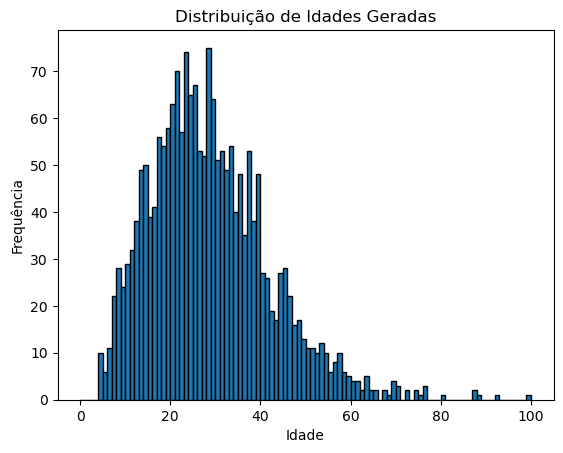

In [28]:
def gerar_idades(tamanho=2000, n=5, p=0.15):
    # Gera idades aleatórias com uma distribuição binomial negativa
    idades = np.random.negative_binomial(n, p, tamanho)
    
    # Ajuste para limitar as idades entre 0 e 100 anos
    idades = np.clip(idades, 4, 100)
    
    return idades

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style()
idades_geradas = gerar_idades()
plt.hist(idades_geradas, bins=range(101), edgecolor='black')
plt.title("Distribuição de Idades Geradas")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

In [48]:
work_data_jobs = work_data[~work_data['ocupation'].isin(['Estudante pré-escola', 'Estudante ensino fundamental I', 'Estudante ensino fundamental II', 'Estudante ensino médio', 'Estudante universitário'])]
work_data_jobs

,ocupation,category,work_time,free_from_work_time,days_work
0,Desenvolvedor de software,Tecnologia,09:00:00,17:00:00,5
1,Engenheiro de dados,Tecnologia,09:00:00,17:00:00,5
2,Arquiteto de TI,Tecnologia,09:00:00,17:00:00,5
3,Administrador de redes,Tecnologia,09:00:00,17:00:00,5
4,Analista de segurança,Tecnologia,09:00:00,17:00:00,5
...,...,...,...,...,...
140,Vendedor,Vendas,09:00:00,17:00:00,5
141,Representante comercial,Vendas,09:00:00,17:00:00,5
142,Gerente de vendas,Vendas,09:00:00,17:00:00,5
143,Supervisor de vendas,Vendas,09:00:00,17:00:00,5


7.666811749447839
7.668787277354069


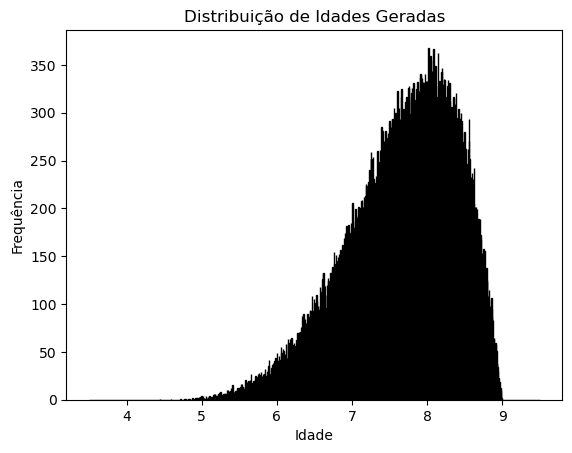

In [91]:
mean = sleep_data.iloc[0]['sleep_hours']

def horarios_beta(n, media_desejada, minimo=4, maximo=9, alpha = 6):
    # Parâmetros alfa e beta escolhidos para cauda à esquerda (alfa pequeno, beta grande)
    media_normalizada = (media_desejada - minimo) / (maximo - minimo)

    # Calcula beta usando a fórmula da média da Beta
    beta = alpha * (1 - media_normalizada) / media_normalizada

    # Gera valores beta entre 0 e 1, depois escala para o intervalo desejado
    beta_values = np.random.beta(alpha, beta, size=n)
    horarios = minimo + (maximo - minimo) * beta_values
    return horarios

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style()
horarios_gerados = horarios_beta(100000, mean, alpha=6)
print(mean)
print(horarios_gerados.mean())
plt.hist(horarios_gerados, bins=np.linspace(3.5 , 9.5, 1000), edgecolor='black')
plt.title("Distribuição de Idades Geradas")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

9
9
7.999638310183012


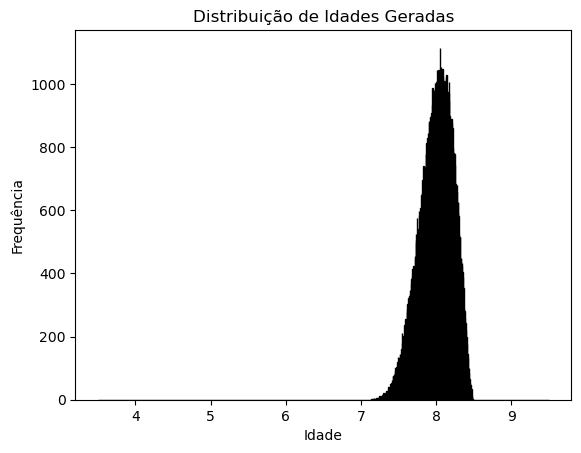

In [97]:
# Horário que acorda
work_time = work_data['work_time'].values[0]
work_time = int(work_time.split(':')[0])
print(work_time)

def horarios_acordar(n, maxi, alpha = 2):
    minimo = maxi - 2
    maximo = maxi - 0.5
    
    media_desejada = maxi - 1
    # Parâmetros alfa e beta escolhidos para cauda à esquerda (alfa pequeno, beta grande)
    media_normalizada = (media_desejada - minimo) / (maximo - minimo)

    # Calcula beta usando a fórmula da média da Beta
    beta = alpha * (1 - media_normalizada) / media_normalizada

    # Gera valores beta entre 0 e 1, depois escala para o intervalo desejado
    beta_values = np.random.beta(alpha, beta, size=n)
    horarios = minimo + (maximo - minimo) * beta_values
    return horarios

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style()
horarios_gerados = horarios_acordar(100000, work_time, alpha=6)
print(work_time)
print(horarios_gerados.mean())
plt.hist(horarios_gerados, bins=np.linspace(3.5 , 9.5, 1000), edgecolor='black')
plt.title("Distribuição de Idades Geradas")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

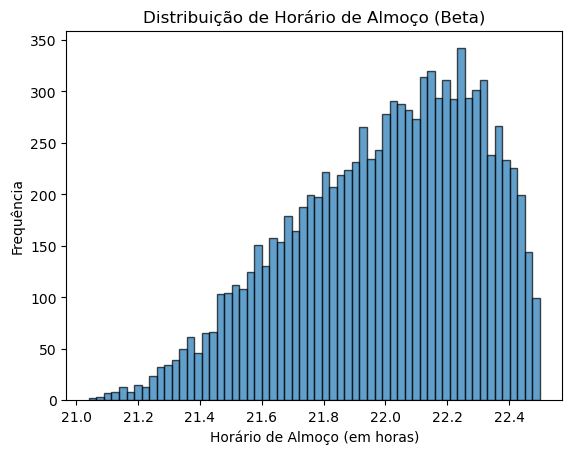

Média dos horários gerados: 22.00 horas
Desvio padrão dos horários gerados: 0.30 horas


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def generate_eat_time(n, mean, minimum, maximum, alpha=2):
    normalized_mean = (mean - minimum) / (maximum - minimum)
    beta = alpha * (1 - normalized_mean) / normalized_mean
    # Generate beta distribution values between 0 and 1, then scale to the desired range
    normalized_eat_times = np.random.beta(alpha, beta, size=n)
    eat_times = minimum + (maximum - minimum) * normalized_eat_times
    return eat_times

'''horarios_almoco = generate_eat_time(10000, 12, 11, 14, alpha=2)
# Plotar o histograma
plt.hist(horarios_almoco, bins=60, edgecolor='black', alpha=0.7)
plt.title("Distribuição de Horário de Almoço (Beta)")
plt.xlabel("Horário de Almoço (em horas)")
plt.ylabel("Frequência")
plt.show()

# Exibir média e desvio padrão
print(f'Média dos horários gerados: {np.mean(horarios_almoco):.2f} horas')
print(f'Desvio padrão dos horários gerados: {np.std(horarios_almoco):.2f} horas')'''

horarios_janta = generate_eat_time(10000, 20, 17, 23, alpha=3)
# Plotar o histograma
plt.hist(horarios_janta, bins=60, edgecolor='black', alpha=0.7)
plt.title("Distribuição de Horário de Almoço (Beta)")
plt.xlabel("Horário de Almoço (em horas)")
plt.ylabel("Frequência")
plt.show()

# Exibir média e desvio padrão
print(f'Média dos horários gerados: {np.mean(horarios_janta):.2f} horas')
print(f'Desvio padrão dos horários gerados: {np.std(horarios_janta):.2f} horas')


In [319]:
# Horas de sono
def get_sleep_time(country, age, minimum = 4, maximum = 9, alpha=6):
    age_ceil = (age + 9)//10 * 10
    sleep_country = sleep_data[sleep_data['country'] == country]
    mean = sleep_country[sleep_country['age_span'] == age_ceil]['sleep_hours'].values[0]
    # Normalized mean calculation
    normalized_mean = (mean - minimum) / (maximum - minimum)

    # Calculates beta using the formula for the mean of the Beta distribution
    beta = alpha * (1 - normalized_mean) / normalized_mean

    # Generate beta values between 0 and 1, then scale to the desired range
    beta_value = np.random.beta(alpha, beta, size=1)[0]
    sleep_time = minimum + (maximum - minimum) * beta_value
    return sleep_time

########################################################################
# Horário que acorda
def get_wake_up_time(work_time, minimum_dif = 2, maximum_dif = 0.5, mean_dif = 1, alpha = 6):
    minimum = work_time - minimum_dif
    maximum = work_time - maximum_dif
    mean = work_time - mean_dif
    
    # Normalized mean calculation
    normalized_mean = (mean - minimum) / (maximum - minimum)

    # Calculates beta using the formula for the mean of the Beta distribution
    beta = alpha * (1 - normalized_mean) / normalized_mean

    # Generate beta values between 0 and 1, then scale to the desired range
    beta_value = np.random.beta(alpha, beta, size=1)[0]
    wake_up_time = minimum + (maximum - minimum) * beta_value
    return wake_up_time

########################################################################
# Horário que come
def generate_eat_time(n, mean, minimum, maximum, alpha=2):
    normalized_mean = (mean - minimum) / (maximum - minimum)
    beta = alpha * (1 - normalized_mean) / normalized_mean
    # Generate beta distribution values between 0 and 1, then scale to the desired range
    normalized_eat_times = np.random.beta(alpha, beta, size=n)
    eat_times = minimum + (maximum - minimum) * normalized_eat_times
    return eat_times


In [132]:
country_data['Languages'].values[0].split(',')

['ar', 'fa', 'en', 'hi', 'ur']

In [172]:
# country_data[country_data['ISO3'] == 'BRA']

country_data['Languages']

user_location = ['BRA', 'USA']
user_language = [country_data[country_data['ISO3'] == location]['Languages'].values[0].split(',') for location in user_location]
user_language = [[languages[0]] + list(np.random.choice(languages[1:], np.random.randint(0, len(languages) - 1), replace=False)) if len(languages) > 1 else [languages[0]] for languages in user_language]
user_language = [','.join(languages) for languages in user_language]
user_language

['pt', 'en,fr,haw']

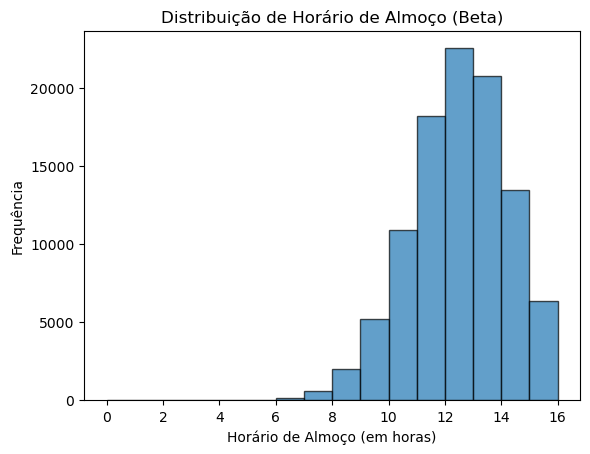

In [232]:
escolaridades = np.random.binomial(16, 0.75, 100000)

plt.hist(escolaridades, bins=range(0, 17), edgecolor='black', alpha=0.7)
plt.title("Distribuição de Horário de Almoço (Beta)")
plt.xlabel("Horário de Almoço (em horas)")
plt.ylabel("Frequência")
plt.show()

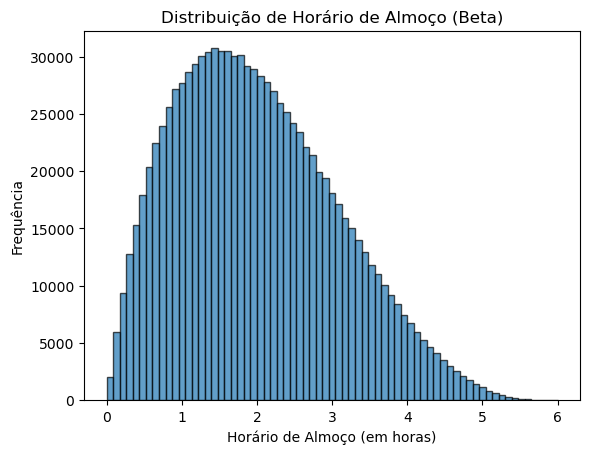

In [251]:
tempo_asistido = np.random.beta(2, 4, 1000000)*6

plt.hist(tempo_asistido, bins=np.linspace(0, 6, 70), edgecolor='black', alpha=0.7)
plt.title("Distribuição de Horário de Almoço (Beta)")
plt.xlabel("Horário de Almoço (em horas)")
plt.ylabel("Frequência")
plt.show()

0.3335406068287203


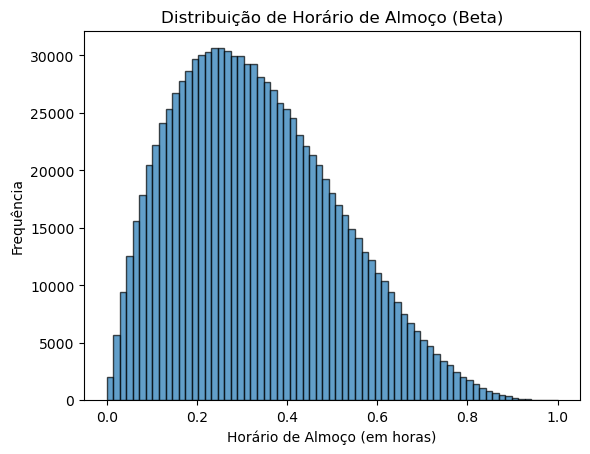

In [255]:
retention_time = np.random.beta(2, 4, 1000000)

print(retention_time.mean())

plt.hist(retention_time, bins=np.linspace(0, 1, 70), edgecolor='black', alpha=0.7)
plt.title("Distribuição de Horário de Almoço (Beta)")
plt.xlabel("Horário de Almoço (em horas)")
plt.ylabel("Frequência")
plt.show()

In [323]:
country_data

,ISO3,ISO-Numeric,Country,Population,Continent,Languages,Timezone
0,ARE,784,United Arab Emirates,9630959,AS,"ar,fa,en,hi,ur",4.0
1,ARG,32,Argentina,44494502,SA,"es,en,it,de,fr,gn",-3.0
2,AUT,40,Austria,8847037,EU,"de,hr,hu,sl",1.0
3,AUS,36,Australia,24992369,OC,en,10.0
4,BEL,56,Belgium,11422068,EU,"nl,fr,de",1.0
...,...,...,...,...,...,...,...
56,TWN,158,Taiwan,23451837,AS,"zh,zh,nan,hak",8.0
57,UKR,804,Ukraine,44622516,EU,"uk,ru,rom,pl,hu",2.0
58,USA,840,United States,327167434,NaN,"en,es,haw,fr",-5.0
59,VNM,704,Vietnam,95540395,AS,"vi,en,fr,zh,km",7.0


In [324]:
from random_username.generate import generate_username

def create_random_user(number_of_users):
    user_location = list(np.random.choice(country_data['ISO3'].unique(), p=probabilities_country, size=number_of_users))
    user_id = [users.shape[0] + i for i in range(number_of_users)]
    user_name = generate_username(number_of_users)
    user_age = np.clip(np.random.negative_binomial(5, 0.15, number_of_users), 4, 100)
    user_ocupation = []
    for age in user_age:
        if age < 6:
            user_ocupation.append('Estudante pré-escola')
        elif age < 11:
            user_ocupation.append('Estudante ensino fundamental I')
        elif age < 15:
            user_ocupation.append('Estudante ensino fundamental II')
        elif age < 18:
            user_ocupation.append('Estudante ensino médio')
        elif age < 23:
            user_ocupation.append('Estudante universitário')
        else:
            user_ocupation.append(np.random.choice(work_data_jobs['ocupation'], size=1)[0])
    user_gender = list(np.random.choice(['M', 'F'], size=number_of_users))
    user_work_time = [work_data[work_data['ocupation'] == ocupation]['work_time'].values[0] for ocupation in user_ocupation]
    user_work_time = [int(work_time.split(':')[0]) for work_time in user_work_time]
    user_free_from_work_time = [work_data[work_data['ocupation'] == ocupation]['free_from_work_time'].values[0] for ocupation in user_ocupation]
    user_free_from_work_time = [int(work_time.split(':')[0]) for work_time in user_free_from_work_time]
    user_work_days = [work_data[work_data['ocupation'] == ocupation]['days_work'].values[0] for ocupation in user_ocupation]
    user_sleep_duration = [get_sleep_time(location, age) for location, age in zip(user_location, user_age)]
    user_wake_time = [get_wake_up_time(work_time) for work_time in user_work_time]
    user_bed_time = np.array([work_time  - sleep_duration for work_time, sleep_duration in zip(user_work_time, user_sleep_duration)])
    user_lunch_time = generate_eat_time(number_of_users, 12, 11, 14, alpha=2)
    # Calculate min/max times ensuring they don't go below certain values
    dinner_min = np.minimum(17, 24 + user_bed_time - 2)
    dinner_max = np.minimum(23, 24 + user_bed_time - 0.5)
    dinner_mean = np.minimum(20, 24 + user_bed_time - 1)
    # Generate dinner times for each user
    user_dinner_time = []
    for i in range(number_of_users):
        time = generate_eat_time(1, dinner_mean[i], dinner_min[i], dinner_max[i], alpha=3)
        user_dinner_time.append(time[0])
        
    user_language = [country_data[country_data['ISO3'] == location]['Languages'].values[0].split(',') for location in user_location]
    user_language = [[languages[0]] + list(np.random.choice(languages[1:], np.random.randint(0, len(languages) - 1), replace=False)) if len(languages) > 1 else [languages[0]] for languages in user_language]
    user_language = [','.join(languages) for languages in user_language]
    user_education = []
    for age in user_age:
        if age < 6:
            user_education.append(0)
        elif age < 23:
            user_education.append(age - 6)
        else:
            user_education.append(np.random.binomial(16, 0.75, 1)[0])
    user_video_watching_time = np.random.beta(2, 4, number_of_users) * 6
    user_video_retention_time = np.random.beta(2, 4, number_of_users)
    user_timezone = np.array([country_data[country_data['ISO3'] == location]['Timezone'].values[0] for location in user_location])
    
    
    df_new_users = pd.DataFrame({
        'user_id': user_id,
        'user_name': user_name,
        'user_bed_time': (np.array(user_bed_time) + user_timezone) % 24,
        'user_wake_time': (np.array(user_wake_time) + user_timezone) % 24,
        'user_lunch_time': (np.array(user_lunch_time) + user_timezone) % 24,
        'user_dinner_time': (np.array(user_dinner_time) + user_timezone) % 24,
        'user_work_time': (np.array(user_work_time) + user_timezone) % 24,
        'user_free_from_work_time': (np.array(user_free_from_work_time) + user_timezone) % 24,
        'user_work_days': user_work_days,
        'user_age': user_age,
        'user_gender': user_gender,
        'user_location': user_location,
        'user_language': user_language,
        'user_ocupation': user_ocupation,
        'user_education': user_education,
        'user_video_watching_time': user_video_watching_time,
        'user_video_retention_time': user_video_retention_time
    })
    
    df_new_USER = pd.DataFrame({
        'UserID': user_id,
        'UserName': user_name,
        'UserEmail': [f"{name}{uid}@gmail.com" for name, uid in zip(user_name, user_id)],
        'UserPassword': [''.join(np.random.choice(list('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'), 10)) for _ in user_id],
        'UserPhoto': [f"mimi.com/images/user={name}{uid}" for name, uid in zip(user_name, user_id)]
    })
    
    return df_new_users, df_new_USER

create_random_user(10)[0]

,user_id,user_name,user_bed_time,user_wake_time,user_lunch_time,user_dinner_time,user_work_time,user_free_from_work_time,user_work_days,user_age,user_gender,user_location,user_language,user_ocupation,user_education,user_video_watching_time,user_video_retention_time
0,0,tautShads2,5.549059,11.844878,16.662280,3.500173,12.5,18.5,5,20,M,IND,"en,bh,ta,or,kn,sa,doi,fr,kok,gu",Estudante universitário,14,2.953563,0.389801
1,1,peacefulZebra4,7.650422,14.187448,19.549677,3.963458,15.0,21.0,5,22,F,CHN,zh,Estudante universitário,16,2.071145,0.259172
2,2,excitedMandrill7,2.491756,8.200994,14.442978,21.606530,9.0,13.0,5,11,M,EGY,ar,Estudante ensino fundamental II,5,2.968281,0.130899
3,3,jealousPorpoise4,6.020667,11.403575,17.658412,1.592379,12.5,18.5,5,22,F,IND,"en,or,hi,te,as,ta,bn,lus,ne,sa,ur,bh,fr,gu,doi...",Estudante universitário,16,2.590436,0.115141
4,4,wrathfulApples3,2.116910,9.189581,14.109852,20.315443,10.0,18.0,5,24,F,FRA,"fr,ca,br",Gerente de hotel,10,0.923548,0.201854
5,5,shyCrane7,20.164278,3.336660,8.409343,17.573056,4.0,10.0,5,20,F,BRA,pt,Estudante universitário,14,1.075318,0.205513
6,6,humorousWildfowl8,7.182471,13.728274,16.745142,0.692977,14.5,22.5,5,46,M,IND,"en,sa,bn,sit,as,pa,sat,inc,doi,gu,ur,ml",Fotógrafo,12,2.771976,0.292108
7,7,ashamedMagpie1,0.269935,7.729327,15.223781,22.057567,9.0,13.0,5,7,F,GRC,"el,en",Estudante ensino fundamental I,1,2.682104,0.298529
8,8,trustingHawk5,2.397575,9.277873,13.780075,20.802122,10.0,16.0,5,48,M,DEU,de,Artista plástico,11,2.585123,0.028618
9,9,curiousMoth1,11.071703,16.784161,19.427886,2.911096,18.0,2.0,6,34,F,CHN,"zh,za",Jogador de futebol,14,3.246071,0.113752


In [ ]:
categories = np.array([
    "Animais",
    "Automóveis",
    "Ciência e tecnologia",
    "Comédia",
    "Educação",
    "Entretenimento",
    "Esportes",
    "Filme e animação",
    "Instruções e estilo",
    "Jogos",
    "Música",
    "Notícias e política",
    "Pessoas e blogs",
    "Sem fins lucrativos e ativismo",
    "Viagens e eventos"
])

In [ ]:
category_suffixes = {
    "Animals": [
        "garden", "world", "zone", "realm", "kingdom", "safari", "tales", "wild", 
        "adventure", "explore", "nature", "life", "tribe", "beast", "den", "paws"
    ],
    "Automobiles": [
        "drive", "speed", "garage", "road", "auto", "gear", "shift", "track", "riders", 
        "zone", "race", "car", "wheel", "machine", "pit", "motors"
    ],
    "Science & Technology": [
        "lab", "hub", "zone", "world", "tech", "sphere", "network", "innovations", "future", 
        "cyber", "digital", "engine", "logic", "machine", "research", "solutions"
    ],
    "Comedy": [
        "show", "world", "times", "laughs", "club", "laugh", "fun", "jokes", "skits", 
        "humor", "giggle", "comedy", "standup", "zone", "sitcom", "sketch"
    ],
    "Education": [
        "hub", "zone", "world", "class", "study", "academy", "school", "learning", 
        "lessons", "institute", "guide", "curriculum", "mastery", "campus", "course", "tutorial"
    ],
    "Entertainment": [
        "world", "show", "stream", "cast", "zone", "media", "hub", "broadcast", 
        "network", "performance", "theater", "stage", "live", "scene", "crew", "stars"
    ],
    "Sports": [
        "league", "zone", "world", "arena", "club", "play", "game", "team", "match", 
        "training", "championship", "court", "field", "competition", "stadium", "pro"
    ],
    "Film & Animation": [
        "studio", "world", "cast", "cinema", "realm", "scene", "animation", "film", 
        "production", "theater", "director", "movie", "story", "crew", "edit", "vision"
    ],
    "How-to & Style": [
        "guide", "world", "style", "zone", "academy", "tutorial", "fashion", "tips", 
        "advice", "inspiration", "howto", "masterclass", "solutions", "insight", "method", "trend"
    ],
    "Gaming": [
        "hub", "zone", "world", "games", "arena", "play", "quest", "challenge", "level", 
        "gamer", "battle", "league", "arcade", "realm", "pro", "strategy"
    ],
    "Music": [
        "studio", "sound", "world", "zone", "vibes", "track", "beat", "melody", "rhythm", 
        "tune", "band", "notes", "song", "album", "wave", "soundscape"
    ],
    "News & Politics": [
        "news", "hub", "daily", "times", "report", "press", "watch", "coverage", 
        "updates", "broadcast", "insight", "politics", "analysis", "story", "coverage", "headlines"
    ],
    "People & Blogs": [
        "journal", "world", "life", "blog", "diary", "stories", "adventures", "experience", 
        "diaries", "daily", "vlog", "thoughts", "expressions", "voice", "memories", "insights"
    ],
    "Nonprofits & Activism": [
        "cause", "world", "action", "impact", "movement", "network", "change", "voice", 
        "project", "campaign", "effort", "solutions", "activism", "mission", "purpose", "unity"
    ],
    "Travel & Events": [
        "journey", "tour", "world", "events", "explore", "adventure", "globe", "escape", 
        "vacation", "trip", "voyage", "path", "discoveries", "trek", "experience", "tourism"
    ]
}

In [ ]:
def create_random_content(users, new_channel_ratio, initial_id, current_date):
    available_users = users[users['user_channel_id'].isna()]
    num_channels = int(available_users.shape[0] * new_channel_ratio)
    channel_id = np.arange(initial_id, initial_id + num_channels, dtype=np.int32)
    channel_users = available_users.sample(num_channels, replace=False)
    channel_creation_date = [current_date for _ in range(num_channels)]
    
    'channel_name',
    'channel_description',
    'channel_language',
    'channel_location',
    'channel_category',
    
    return 

In [ ]:
def create_random_content(channels, categories, content_ratio, initial_id, current_date):
    num_content = int(channels.shape[0] * content_ratio)
    content_id = np.arange(initial_id, initial_id + num_content, dtype=np.int32)
    content_channel = channels.sample(num_content, replace=False)
    content_creation_date = np.full(num_content, current_date)
    content_title = np.array([f"{content_channel.iloc[i, 'channel_name'].values[0]} Content {current_date}" for i in range(num_content)])
    content_description = np.array([f"Description for {content_title[i]}" for i in range(num_content)])
    content_status = np.random.choice(['Public', 'Private', 'Unlisted'], num_content, p=[0.8, 0.1, 0.1])
    content_category = np.array([
        content_channel.iloc[i]['channel_category'] if np.random.rand() < 0.8 
        else np.random.choice(categories) 
        for i in range(num_content)
    ])
    content_tags = np.array([
        [content_category[i]] + list(np.random.choice(categories, np.random.randint(0, 4), replace=False)) for i in range(num_content)
    ])
    languages = np.unique(country_data['Languages'].join(',').split(','))
    content_language = np.array([
        np.random.choice(content_channel.iloc[i]['channel_language'].split(',')) if np.random.rand() < 0.8 
        else np.random.choice(languages) 
        for i in range(num_content)
    ])
    content_creation_date = np.full(num_content, current_date)
    content_view_count = np.zeros(num_content, dtype=np.int32)
    content_like_count = np.zeros(num_content, dtype=np.int32)
    content_dislike_count = np.zeros(num_content, dtype=np.int32)
    content_comment_count = np.zeros(num_content, dtype=np.int32)
    content_comments = np.full(num_content, None, dtype=object)
    content_ind_rating = np.random.choice(['General Audience', 'Kids', 'Default', 'Age-Restricted'], num_content, p=[0.35, 0.2, 0.35, 0.1])
    content_type = np.random.choice(['Video', 'Short', 'Live'], num_content, p=[0.6, 0.3, 0.1])
    content_is_live = np.array([False if content_type[i] != 'Live' else True for i in range(num_content)])
    for i in range(num_content):
        match content_type[i]:
            case 'Video':
                content_duration = np.random.beta(2, 4, 1)[0] * 60
            case 'Short':
                content_duration = np.random.beta(4, 2, 1)[0] * 60
            case 'Live':
                content_duration = np.random.beta(2, 3, 1)[0] * 18000
    
    df_new_content = pd.DataFrame({
        'content_id': content_id,
        'channel_id': content_channel.iloc[:, 0].values,  # Assuming the first column of content_channel is 'channel_id'
        'content_title': content_title,
        'content_description': content_description,
        'content_status': content_status,
        'content_category': content_category,
        'content_tags': content_tags,
        'content_language': content_language,
        'content_duration': content_duration,
        'content_creation_date': content_creation_date,
        'content_view_count': content_view_count,
        'content_like_count': content_like_count,
        'content_dislike_count': content_dislike_count,
        'content_comment_count': content_comment_count,
        'content_ind_rating': content_ind_rating,
        'content_type': content_type,
        'content_is_live': content_is_live,
        'content_comments': content_comments,
    })
    
    def to_base62(num):
        chars = "0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ"
        base = len(chars)
        result = []
        while num > 0:
            result.append(chars[num % base])
            num //= base
        return ''.join(reversed(result)) or '0'

    def generate_video_name_id(video_name, video_id):
        video_id_base62 = to_base62(video_id)
        return f"{video_name}_{video_id_base62}"
    
    content = pd.DataFrame({
        'ContentID': content_id,
        'ContentURL': [f"https://mimi.com/content={generate_video_name_id(content_title[i], content_id[i])}" for i in range(num_content)],
        'CONTTitle': content_title,
        'CONTPubDateTime': content_creation_date,
        'CONTStatus': content_status,
        'CONTCategory': content_category,
        'CONTLanguage': content_language,
        'CONTThumb': [f"https://mimi.com/images/content={generate_video_name_id(content_title[i], content_id[i])}.jpg" for i in range(num_content)],
        'CONTDesc': content_description,
        'CONTCaptionLanguage': content_language,
        'CONTIndRating': content_ind_rating,
        'ChannelID': content_channel.iloc[:, 0].values,  # Assuming the first column of content_channel is 'channel_id'
    })
    
    
    return df_new_content, content


3.334012032085364


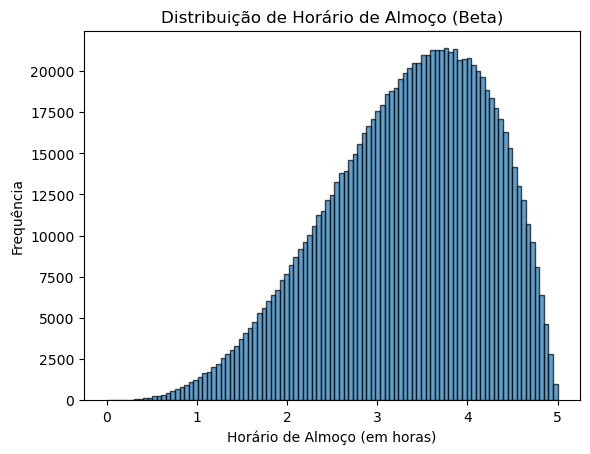

In [6]:
import numpy as np
import matplotlib.pyplot as plt

retention_time = np.random.beta(4, 2, 1000000)*5

print(retention_time.mean())

plt.hist(retention_time, bins=np.linspace(0, 5, 100), edgecolor='black', alpha=0.7)
plt.title("Distribuição de Horário de Almoço (Beta)")
plt.xlabel("Horário de Almoço (em horas)")
plt.ylabel("Frequência")
plt.show()

In [8]:
import numpy as np
import pandas as pd
country_data = pd.read_csv('../data/behavior_generated/country_data_cleaned.csv')
country_data['Languages']

0                        ar,fa,en,hi,ur
1                     es,en,it,de,fr,gn
2                           de,hr,hu,sl
3                                    en
4                              nl,fr,de
                    ...                
56                        zh,zh,nan,hak
57                      uk,ru,rom,pl,hu
58                         en,es,haw,fr
59                       vi,en,fr,zh,km
60    zu,xh,af,nso,en,tn,st,ts,ss,ve,nr
Name: Languages, Length: 61, dtype: object